## PCA - Wine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
wine_std.shape

(178, 13)

#### 1. 차원 축소
- 13 차원을 2, 4, 6 차원으로 축소

In [3]:
from sklearn.decomposition import PCA

In [4]:
# 2차원
pca2 = PCA(n_components=2)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2[:3]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ]])

In [5]:
pca2.explained_variance_ratio_, sum(pca2.explained_variance_ratio_)

(array([0.36198848, 0.1920749 ]), 0.5540633835693529)

In [6]:
# 4차원
pca4 = PCA(n_components=4)
wine_pca4 = pca4.fit_transform(wine_std)
wine_pca4[:3]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231]])

In [7]:
pca4.explained_variance_ratio_, sum(pca4.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ]), 0.7359899907589929)

In [8]:
# 6차원
pca6 = PCA(n_components=6)
wine_pca6 = pca6.fit_transform(wine_std)
pca6.explained_variance_ratio_, sum(pca6.explained_variance_ratio_)

(array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
        0.04935823]),
 0.8509811607477045)

#### 2. PCA 전후의 분류 성능 비교

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

- 원본 데이터

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9722222222222222

- 주성분: 2개

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9722222222222222

- 주성분: 4개

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca4, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9444444444444444

- 주성분: 6개

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca6, wine.target, stratify=wine.target, test_size=0.2, random_state=2023
)
svc = SVC(random_state=2023)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9722222222222222

#### 3. 시각화

In [14]:
df = pd.DataFrame(wine_pca2, columns=['PC1','PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


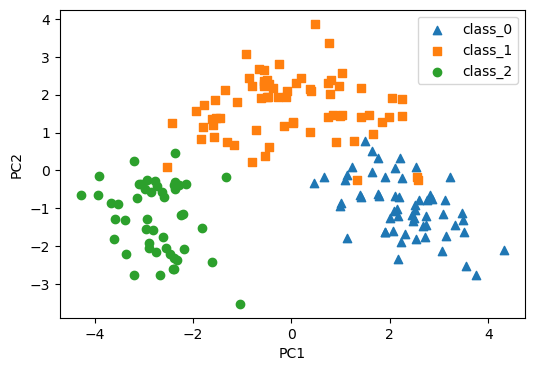

In [15]:
markers = ['^','s','o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
plt.legend()
plt.xlabel('PC1'), plt.ylabel('PC2')
plt.show()

#### 4. 비교 종합

In [18]:
rf = pd.DataFrame({
    '설명력':[1,sum(pca2.explained_variance_ratio_),sum(pca4.explained_variance_ratio_),sum(pca6.explained_variance_ratio_)],
    'SVC 정확도':[0.9722,0.9722,0.9444,0.9722]
})
rf.index = ['원본', '2차원', '4차원', '6차원']
rf

,설명력,SVC 정확도
원본,1.000000,0.9722
2차원,0.554063,0.9722
4차원,0.735990,0.9444
6차원,0.850981,0.9722
